In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
!wandb login 9676e3cc95066e4865586082971f2653245f09b4

Appending key for api.wandb.ai to your netrc file: /Users/guydavidson/.netrc
Successfully logged in to Weights & Biases!


In [3]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
from scipy.special import factorial

from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib import path as mpath
import matplotlib.gridspec as gridspec

import pickle
import tabulate
import wandb

In [4]:
api = wandb.Api()

In [56]:
initial_runs = api.runs('augmented-frostbite/initial-experiments')

In [81]:
q_value_means = []
q_value_stds = []

reward_means = []
reward_stds = []

for run in initial_runs:
    history = run.history(pandas=True)
    print(run.name)
    q_value_means.append(np.array(history['Q_value_mean'], dtype=np.float))
    q_value_stds.append(np.array(history['Q_value_std'], dtype=np.float))
    
    reward_means.append(np.array(history['reward_mean'], dtype=np.float))
    reward_stds.append(np.array(history['reward_std'], dtype=np.float))
    
for result_list in (q_value_means, q_value_stds, reward_means, reward_stds):
    max_len = max([arr.shape[0] for arr in result_list])
    
    for i, arr in enumerate(result_list):
        result_list[i] = np.pad(arr, (0, max_len - arr.shape[0]), 'constant', constant_values=np.nan)

v749hmij
q44hj3ie
p5i0rr8u
gry5y7b7
bbdf1qhy
993nufmo
6ldzgz9h
2521op65
ni0egvu9
h7p0by6k


# Basic plots

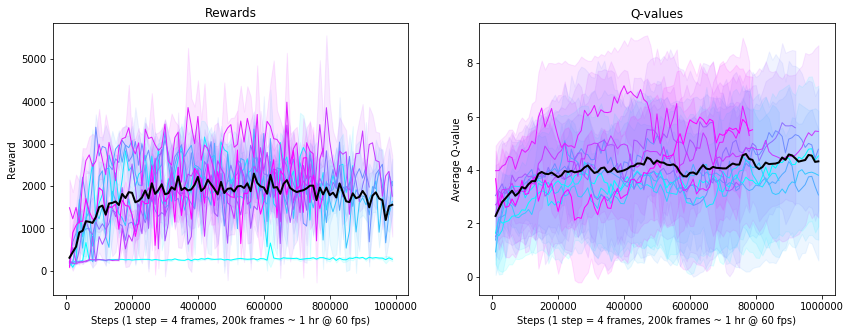

In [100]:
NROWS = 1
NCOLS = 2
COL_WIDTH = 6
ROW_HEIGHT = 5 
WIDTH_SPACING = 2
HEIGHT_SPACING = 0
COLORMAP = 'cool'

figure = plt.figure(figsize=(NCOLS * COL_WIDTH + WIDTH_SPACING, NROWS * ROW_HEIGHT + HEIGHT_SPACING))
plt.subplots_adjust(hspace=0.4, wspace=0.2)

x = np.arange(1, 100) * 10000
cmap = plt.get_cmap(COLORMAP)

reward_ax = plt.subplot(NROWS, NCOLS, 1)

for i, (r_mean, r_std) in enumerate(zip(reward_means, reward_stds)):
    color = cmap(i / 9)
    reward_ax.plot(x, r_mean, lw=1, color=color)
    reward_ax.fill_between(x, r_mean - r_std, r_mean + r_std, color=color, alpha=0.10)
    
overall_reward_mean = np.nanmean(reward_means, axis=0)
reward_ax.plot(x, overall_reward_mean, lw=2, color='black')
    
# reward_ax.set_yscale('log')
reward_ax.set_title('Rewards')
reward_ax.set_xlabel('Steps (1 step = 4 frames, 200k frames ~ 1 hr @ 60 fps)')
reward_ax.set_ylabel('Reward')

q_ax = plt.subplot(NROWS, NCOLS, 2)

for i, (q_mean, q_std) in enumerate(zip(q_value_means, q_value_stds)):
    color = cmap(i / 9)
    q_ax.plot(x, q_mean, color=color, lw=1)
    q_ax.fill_between(x, q_mean - q_std, q_mean + q_std, color=color, alpha=0.10)
    
overall_q_mean = np.nanmean(q_value_means, axis=0)
q_ax.plot(x, overall_q_mean, lw=2, color='black')
    
# reward_ax.set_yscale('log')
q_ax.set_title('Q-values')
q_ax.set_xlabel('Steps (1 step = 4 frames, 200k frames ~ 1 hr @ 60 fps)')
q_ax.set_ylabel('Average Q-value')


plt.show()

array([ 308.3       ,  441.5       ,  569.7       ,  907.2       ,
        944.9       , 1171.6       , 1156.5       , 1131.1       ,
       1267.5       , 1504.        , 1540.        , 1327.6       ,
       1589.6       , 1604.3       , 1637.3       , 1553.9       ,
       1815.9       , 1719.1       , 1857.9       , 1842.9       ,
       1618.8       , 1653.5       , 1731.2       , 1897.6       ,
       1712.6       , 2068.1       , 1816.7       , 1908.3       ,
       2045.5       , 1808.        , 1832.8       , 1975.6       ,
       1915.6       , 2231.7       , 1905.8       , 1961.1       ,
       1898.1       , 1923.7       , 2032.        , 2219.        ,
       1885.4       , 1962.7       , 2149.2       , 2044.2       ,
       1934.6       , 1804.9       , 2101.7       , 1837.3       ,
       1936.        , 1949.6       , 1872.1       , 1993.2       ,
       2005.7       , 1957.2       , 2067.        , 1879.        ,
       2297.3       , 2078.6       , 1994.2       , 1968.5    

In [11]:
initial_runs[0].config['seed']

133

In [32]:
initial_runs[0].name

'v749hmij'

In [33]:
h = initial_runs[0].history()

In [42]:
h['steps'].iat[-1]

990000

In [58]:
for existing_run in api.runs('augmented-frostbite/initial-experiments'):
    if existing_run.config['seed'] == 123:
        print(existing_run.history()['steps'])

0    10000.0
1    20000.0
2        NaN
Name: steps, dtype: float64


In [19]:
files = initial_runs[0].files()

In [23]:
for f in initial_runs[0].files('config2.yaml'):
    print(f.name)

AttributeError: File config2.yaml does not exist.

In [25]:
initial_runs[0].file('config2.yaml')

CommError: File config2.yaml does not exist.

In [50]:
r = initial_runs[0]

In [57]:
for r in api.runs('augmented-frostbite/initial-experiments'):
    print(r.name, r.storage_id)

sxi69bv7 UnVuOnYxOnN4aTY5YnY3OmluaXRpYWwtZXhwZXJpbWVudHM6YXVnbWVudGVkLWZyb3N0Yml0ZQ==
v749hmij UnVuOnYxOnY3NDlobWlqOmluaXRpYWwtZXhwZXJpbWVudHM6YXVnbWVudGVkLWZyb3N0Yml0ZQ==
q44hj3ie UnVuOnYxOnE0NGhqM2llOmluaXRpYWwtZXhwZXJpbWVudHM6YXVnbWVudGVkLWZyb3N0Yml0ZQ==
p5i0rr8u UnVuOnYxOnA1aTBycjh1OmluaXRpYWwtZXhwZXJpbWVudHM6YXVnbWVudGVkLWZyb3N0Yml0ZQ==
gry5y7b7 UnVuOnYxOmdyeTV5N2I3OmluaXRpYWwtZXhwZXJpbWVudHM6YXVnbWVudGVkLWZyb3N0Yml0ZQ==
bbdf1qhy UnVuOnYxOmJiZGYxcWh5OmluaXRpYWwtZXhwZXJpbWVudHM6YXVnbWVudGVkLWZyb3N0Yml0ZQ==
993nufmo UnVuOnYxOjk5M251Zm1vOmluaXRpYWwtZXhwZXJpbWVudHM6YXVnbWVudGVkLWZyb3N0Yml0ZQ==
6ldzgz9h UnVuOnYxOjZsZHpnejloOmluaXRpYWwtZXhwZXJpbWVudHM6YXVnbWVudGVkLWZyb3N0Yml0ZQ==
2521op65 UnVuOnYxOjI1MjFvcDY1OmluaXRpYWwtZXhwZXJpbWVudHM6YXVnbWVudGVkLWZyb3N0Yml0ZQ==
ni0egvu9 UnVuOnYxOm5pMGVndnU5OmluaXRpYWwtZXhwZXJpbWVudHM6YXVnbWVudGVkLWZyb3N0Yml0ZQ==
h7p0by6k UnVuOnYxOmg3cDBieTZrOmluaXRpYWwtZXhwZXJpbWVudHM6YXVnbWVudGVkLWZyb3N0Yml0ZQ==


In [54]:
dir(initial_runs[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_attrs',
 '_base_dir',
 '_exec',
 '_files',
 '_summary',
 'client',
 'create',
 'dir',
 'file',
 'files',
 'history',
 'json_config',
 'load',
 'name',
 'path',
 'project',
 'snake_to_camel',
 'state',
 'storage_id',
 'summary',
 'update',
 'url',
 'user',
 'username']

In [31]:
tqdm.trange?

Signature: tqdm.trange(*args, **kwargs)
Docstring:
A shortcut for tqdm(xrange(*args), **kwargs).
On Python3+ range is used instead of xrange.
File:      ~/anaconda/lib/python3.6/site-packages/tqdm/_tqdm.py
Type:      function


In [60]:
s = 'cabac'

s == s[::-1]

True